In [0]:
%%capture
!pip install cadCAD


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: single_proc: [<cadCAD.configuration.Configuration object at 0x7f24aa58a470>]
Configurations: [<cadCAD.configuration.Configuration object at 0x7f24aa58a470>]


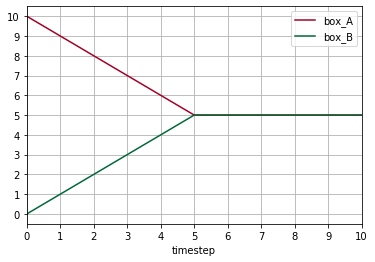

In [23]:
#@title How many marbles in box A? Then press Ctrl+F9 (or Cmd+F9) to run.
marbles = 10 #@param {type:"number"}
%matplotlib inline
def run(n):
    #!/usr/bin/env python
    # coding: utf-8

    # In[1]:


    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
    # List of all the state variables in the system and their initial values
    initial_conditions = {
        'box_A': n, # as per the description of the example, box_A starts out with 10 marbles in it
        'box_B': 0 # as per the description of the example, box_B starts out empty
    }
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 


    # In[2]:


    def update_A(params, step, sL, s, _input):
        y = 'box_A'
        add_to_A = 0
        if (s['box_A'] > s['box_B']):
            add_to_A = -1
        elif (s['box_A'] < s['box_B']):
            add_to_A = 1
        x = s['box_A'] + add_to_A
        return (y, x)

    def update_B(params, step, sL, s, _input):
        y = 'box_B'
        add_to_B = 0
        if (s['box_B'] > s['box_A']):
            add_to_B = -1
        elif (s['box_B'] < s['box_A']):
            add_to_B = 1
        x = s['box_B'] + add_to_B
        return (y, x)


    # In[3]:


    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
    # In the Partial State Update Blocks, the user specifies if state update functions will be run in series or in parallel
    partial_state_update_blocks = [
        { 
            'policies': { # We'll ignore policies for now
            },
            'variables': { # The following state variables will be updated simultaneously
                'box_A': update_A,
                'box_B': update_B
            }
        }
    ]
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 


    # In[4]:


    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
    # Settings of general simulation parameters, unrelated to the system itself
    # `T` is a range with the number of discrete units of time the simulation will run for;
    # `N` is the number of times the simulation will be run (Monte Carlo runs)
    # In this example, we'll run the simulation once (N=1) and its duration will be of 10 timesteps
    # We'll cover the `M` key in a future article. For now, let's leave it empty
    simulation_parameters = {
        'T': range(10),
        'N': 1,
        'M': {}
    }
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 


    # In[5]:


    from cadCAD.configuration import Configuration

    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
    # The configurations above are then packaged into a `Configuration` object
    config = Configuration(initial_state=initial_conditions, #dict containing variable names and initial values
                           partial_state_update_blocks=partial_state_update_blocks, #dict containing state update functions
                           sim_config=simulation_parameters #dict containing simulation parameters
                          )


    # In[6]:


    from cadCAD.engine import ExecutionMode, ExecutionContext, Executor
    exec_mode = ExecutionMode()
    exec_context = ExecutionContext(exec_mode.single_proc)
    executor = Executor(exec_context, [config])
    raw_result, tensor = executor.execute() 


    # In[7]:


    import pandas as pd
    df = pd.DataFrame(raw_result)
    df.set_index(['run', 'timestep', 'substep'])
    df.plot('timestep', ['box_A', 'box_B'], grid=True, 
        colormap = 'RdYlGn',
        xticks=list(df['timestep'].drop_duplicates()), 
        yticks=list(range(1+(df['box_A']+df['box_B']).max())))
run(marbles)